<a href="https://colab.research.google.com/github/victordsrocha/Aprendizagem-de-Maquina-2021.1/blob/main/ML_Trabalho_Final_Rede_Neural_1_bola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Includes

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Dataset

In [2]:
dataset_path = 'https://github.com/victordsrocha/Aprendizagem-de-Maquina-2021.1/raw/main/dataset-1bola.csv'

column_names = ['bola_branca_x','bola_branca_y','bola_1_x','bola_1_y','tacada_x',
                'tacada_y','forca','out_bola_branca_x','out_bola_branca_y','out_bola_1_x',
                'out_bola_1_y','dist_custo1','dist_custo2','dist_custo3','dist_custo4',
                'colisao_x','colisao_y']

raw_dataset = pd.read_csv(dataset_path, names=column_names, sep=',')

# drop das colunas que não vamos utilizar neste treinamento
raw_dataset=raw_dataset.drop(columns=['forca','out_bola_branca_x','out_bola_branca_y','out_bola_1_x',
                'out_bola_1_y','dist_custo1','dist_custo2','dist_custo3','dist_custo4',
                'colisao_x','colisao_y'])

dataset = raw_dataset.copy()

# apresentação de exemplos
dataset.tail()

,bola_branca_x,bola_branca_y,bola_1_x,bola_1_y,tacada_x,tacada_y
83911,0.211559,0.273849,0.069541,0.068641,-0.559838,-0.828602
83912,0.779373,0.386655,0.772425,0.212990,-0.070697,-0.997498
83913,0.797904,0.376335,0.753802,0.029519,-0.150995,-0.988534
83914,0.799908,0.253087,0.602778,0.141271,-0.857461,-0.514549
83915,0.446634,0.062459,0.940956,0.638424,0.656110,0.754666


Entrada e saída

In [3]:
X = dataset[['bola_branca_x','bola_branca_y','bola_1_x','bola_1_y']]
# y = pd.DataFrame({"arc_tangent":np.arctan(dataset['tacada_x'] / dataset['tacada_y']).T})
y = dataset[['tacada_x','tacada_y']]

Split the data into train and test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Apresentação dos dados

In [5]:
# apresenta a descrição dos dados de treino - entrada
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bola_branca_x,67132.0,0.512318,0.255489,0.010084,0.305967,0.500139,0.726007,0.990000
bola_branca_y,67132.0,0.374178,0.194228,0.010083,0.216302,0.375000,0.531559,0.740000
bola_1_x,67132.0,0.517022,0.327201,0.009782,0.191748,0.540294,0.820357,0.991592
bola_1_y,67132.0,0.374911,0.231907,0.008124,0.153846,0.375000,0.596124,0.742211


In [6]:
# apresenta a descrição dos dados de treino - saída
y_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tacada_x,67132.0,0.016376,0.710816,-1.0,-0.720506,0.080571,0.728562,1.0
tacada_y,67132.0,0.002079,0.703195,-1.0,-0.688071,0.006152,0.690686,1.0


# Build the model

In [7]:
# dimensões de entrada e saída
in_dim = X_train.shape[1]
out_dim = y_train.shape[1]

# modelo
model = keras.models.Sequential()
model.add(layers.Dense(64, input_dim=in_dim, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(out_dim))

optimizer = keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(loss="mse", optimizer=optimizer, metrics=['mae','mse'])

# log tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logggs")

# early stop
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

# sumário do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 4,610
Trainable params: 4,610
Non-trainable params: 0
_________________________________________________________________


Train the model

In [8]:
history = model.fit(
    X_train, y_train, epochs=1000, 
    validation_data=(X_test, y_test),
    batch_size=128, verbose=1,
    callbacks=[early_stop, tensorboard_callback])

Epoch 1/1000
525/525 [==============================] - 2s 2ms/step - loss: 0.0569 - mae: 0.1504 - mse: 0.0569 - val_loss: 0.0119 - val_mae: 0.0604 - val_mse: 0.0119
Epoch 2/1000
525/525 [==============================] - 1s 2ms/step - loss: 0.0086 - mae: 0.0506 - mse: 0.0086 - val_loss: 0.0089 - val_mae: 0.0637 - val_mse: 0.0089
Epoch 3/1000
525/525 [==============================] - 1s 2ms/step - loss: 0.0053 - mae: 0.0405 - mse: 0.0053 - val_loss: 0.0038 - val_mae: 0.0322 - val_mse: 0.0038
Epoch 4/1000
525/525 [==============================] - 1s 2ms/step - loss: 0.0040 - mae: 0.0365 - mse: 0.0040 - val_loss: 0.0027 - val_mae: 0.0267 - val_mse: 0.0027
Epoch 5/1000
525/525 [==============================] - 1s 2ms/step - loss: 0.0033 - mae: 0.0338 - mse: 0.0033 - val_loss: 0.0030 - val_mae: 0.0337 - val_mse: 0.0030
Epoch 6/1000
525/525 [==============================] - 1s 2ms/step - loss: 0.0028 - mae: 0.0315 - mse: 0.0028 - val_loss: 0.0039 - val_mae: 0.0418 - val_mse: 0.0039
Epoc

In [9]:
# Comandos para fazer download da pasta de logs para o tensorboard

"""
!zip -r /content/file.zip /content/logggs
from google.colab import files
files.download("/content/file.zip")
"""

'\n!zip -r /content/file.zip /content/logggs\nfrom google.colab import files\nfiles.download("/content/file.zip")\n'

# Plot

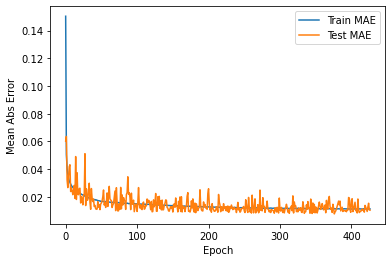

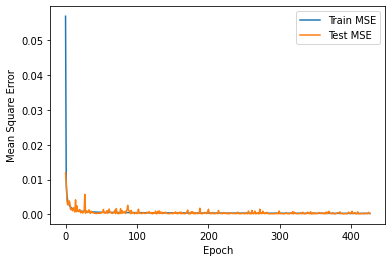

In [10]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'], label='Train MAE')
  plt.plot(hist['epoch'], hist['val_mae'], label='Test MAE')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'], label='Train MSE')
  plt.plot(hist['epoch'], hist['val_mse'], label='Test MSE')
  plt.legend()
  

plot_history(history)



# Simulação

In [11]:
""" 
esta célula contém a função custo, originalmente projetada para retornar o desempenho de uma jogada
de acordo com as distâncias das bolas e buracos. Utilizaremos-a aqui para rodar uma simulação
para uma certa entrada e sua respectiva predição pelo modelo. Quando é retornado zero,
indica que houve encaçapamento.
"""

import math

voids = [.01+.01j,.01+.74j,.99+.01j,.99+.74j]
atrito = .998 #não é atrito de verdade, seria mais 1-coeficiente de atrito
dclosest = lambda pos: min([abs(pos-void) for void in voids])

from numpy import angle
def angulo(x):
 return angle(x)+6.28 if x.imag<0 else angle(x)

#Aqui vamos definir como a sinuca ficará após um instante que idealmente seria 0
class Ball:
 #Inicializar default como uma bola branca no centro
 def __init__(self, pos=.5+.375j, v=0, color=(255,255,255), void=0, ball=None):
  if ball:
   pos = ball.pos
   v = ball.v
   color = ball.color
   void = ball.void
  self.pos = pos
  self.v = v
  #A cor vai ser um tuple em RGB
  self.color = color
  #as bolas encaçapadas tem void = posição que foi encaçapada, do contrário, void = 0
  self.void = void

def custo(posicoes,tacada):
   score=0
   balls = []
   balls.append(Ball(pos=posicoes[0]))
   for pos in posicoes[1:]:
      balls.append(Ball(pos=pos,color=(255,0,0)))
   logCUSTOprod_start = np.sum([np.log(dclosest(ballx.pos)) if (ballx.color!=(255,255,255) and ballx.void==0) else 0 for ballx in balls])
   CUSTOProd_start = np.e**logCUSTOprod_start
   balls[0].v=tacada
   while (sum([abs(ball.v) for ball in balls]))>.0005:
    for ball in balls:
      #velocidade mínima
      if abs(ball.v)<.0001: continue
      nextpos = ball.pos+ball.v
      if nextpos.real < .01: #batida no lado esquerdo da sinuca
       ball.pos = .01+nextpos.imag*1j
       ball.v = -ball.v.real+ball.v.imag*1j #troca o componente x da velocidade
       continue
      if nextpos.imag < .01: #batida na parte de cima da sinuca
       ball.pos=nextpos.real+1j*.01
       ball.v = ball.v.real-ball.v.imag*1j #troca o componente y da velocidade
       continue
      if nextpos.real > .99: #batida no lado direito da sinuca
       ball.pos=.99+nextpos.imag*1j
       ball.v = -ball.v.real+ball.v.imag*1j #troca o componente x da velocidade
       continue
      if nextpos.imag > .74: #batida na parte de baixo da sinuca
       ball.pos=nextpos.real+1j*.74
       ball.v = ball.v.real-ball.v.imag*1j #troca o componente y da velocidade
       continue
      #aqui vou navegar por todas as bolas e ver se alguma encosta, ou seja, tem uma distância menor que a soma dos raios
      for secball in balls:
       if secball.color == ball.color: continue
       if secball.void: continue #ignora bolas encaçapadas
       #se tiver a distância menor que a soma dos raios, muda a velocidade das duas
       if abs(nextpos-secball.pos)<.02:
        #(ball.real - sec.real) < 0 and (ball.imag - sec.imag)<0 rot negativa
        #(ball.real - sec.real) > 0 and (ball.imag - sec.imag)>0 rot negativa
        rot = math.pi/2
        #a (x0i + y0j) + b (x1i +y1j) = (x2i + y2j)
        #variáveis conhecidas: x0,x1,x2,y0,y1,y2
        #a x0 + b x1 = x2
        #a y0 + b y1 = y2
        #a = (x2 * y1 - x1 * y2) / (x0 * y1 - x1 * y0)
        #b = (x0 * y2 - x2 * y0) / (x0 * y1 - x1 * y0)
        momento = ball.v# a resultante tem que ser igual a isso
        secball.v = (nextpos-secball.pos)/abs(nextpos-secball.pos)
        ball.v = (nextpos-secball.pos)/abs(nextpos-secball.pos)*(math.e**(1j*rot))
        #print(momento)
        #print(secball.v)
        #print(ball.v)
        if abs(angulo(ball.v)-angulo(momento))>math.pi/2:
         rot *= -1
        ball.v = (nextpos-secball.pos)/abs(nextpos-secball.pos)*(math.e**(1j*rot))        
        #a (ball.v.reali + ball.v.imagj) + b (secball.v.reali +secball.v.imagj) = (momento.reali + momento.imagj)
        #variáveis conhecidas: ball.v.real,secball.v.real,momento.real,ball.v.imag,secball.v.imag,momento.imag
        #a ball.v.real + b secball.v.real = momento.real
        #a ball.v.imag + b secball.v.imag = momento.imag
        a = (momento.real * secball.v.imag - secball.v.real * momento.imag) / (ball.v.real * secball.v.imag - secball.v.real * ball.v.imag)
        b = (ball.v.real * momento.imag - momento.real * ball.v.imag) / (ball.v.real * secball.v.imag - secball.v.real * ball.v.imag)
        ball.v*=a
        secball.v*=b
        #pygame.draw.line(screen, (255,255,255), ((ball.pos).real*sz[0],(ball.pos).imag*sz[0]), ((10000*secball.v+ball.pos).real*sz[0],(10000*ball.v+ball.pos).imag*sz[0]),3)
        #pygame.display.update()
       #enquanto elas não desencostarem, elas tem que se mexer
        while abs(nextpos-secball.pos)<.02:
         secball.pos += secball.v
         ball.pos += ball.v
         if ball.pos.real < .01: #batida no lado esquerdo da sinuca
          ball.pos = .01+nextpos.imag*1j
          ball.v = -ball.v.real+ball.v.imag*1j #troca o componente x da velocidade
         if ball.pos.imag < .01: #batida na parte de cima da sinuca
          ball.pos=nextpos.real+1j*.01
          ball.v = ball.v.real-ball.v.imag*1j #troca o componente y da velocidade
         if ball.pos.real > .99: #batida no lado direito da sinuca
          ball.pos=.99+nextpos.imag*1j
          ball.v = -ball.v.real+ball.v.imag*1j #troca o componente x da velocidade
         if ball.pos.imag > .74: #batida na parte de baixo da sinuca
          ball.pos=nextpos.real+1j*.74
          ball.v = ball.v.real-ball.v.imag*1j #troca o componente y da velocidade
        continue
      #Aqui só chega se não houver nenhuma colisão 
      #Para ver se a bola foi encaçapada, verificamos se a velocidade está abaixo do aceitável e se a distância do centro
      #da bola para um dos buracos está adequada
      for void in voids:
        if abs(nextpos - void)<.015 and abs(ball.v)<.005:
         if ball.color==(255,255,255): #se a bola for branca ela deve ser levada à sua posição inicial
          ball.void = 1
          ball.v = 0
         else:
          ball.v=0
          nextpos=void
          ball.void=void
          score=1
      ball.pos=nextpos
      ball.v*=atrito
   if score: CUSTOprod = 0; diffCUSTOprod = 0
   else:
    logCUSTOprod = np.sum([np.log(dclosest(ballx.pos)) if (ballx.color!=(255,255,255) and ballx.void==0) else 0 for ballx in balls])
    CUSTOProd = np.e**logCUSTOprod
    diffCUSTOprod = CUSTOProd/CUSTOProd_start
   return diffCUSTOprod

In [12]:
"""
Esta célula executa 1000 simulações e informa a porcentagem de encaçapamentos
realizados (sucessos).
"""

import random

def gera_entrada_aleatoria():
  x0 = random.uniform(0.01,0.99)
  y0 = random.uniform(0.01,0.99)
  x1 = random.uniform(0.01,0.99)
  y1 = random.uniform(0.01,0.99)
  if np.abs(x0-x1)<0.2 or np.abs(y0-y1)<0.2:
    return gera_entrada_aleatoria()
  return np.array([x0 + y0 * 1j, x1 + y1 * 1j])


sucessos = 0
for i in range(1000):
  nova_entrada_complex = gera_entrada_aleatoria()
  nova_entrada = [nova_entrada_complex[0].real, nova_entrada_complex[0].imag, nova_entrada_complex[1].real, nova_entrada_complex[1].imag]
  nova_entrada = np.array([nova_entrada])
  pred = model.predict(nova_entrada)
  pred = np.array([pred[0][0], pred[0][1]])

  tacada_complex =  0.003 * (pred[0] + pred[1] * 1j)

  ponto = custo(nova_entrada_complex, tacada_complex) == 0

  if ponto:
    sucessos += 1

print("Percentual de sucessos: {}%".format(100*(sucessos/1000)))

Percentual de sucessos: 7.199999999999999%
